In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/data_cleaned_2021.csv', index_col='index')

The data I am using here is cleaned of duplicates that were present in the dataset

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [4]:
skills = ['Python', 'spark', 'aws',
          'excel', 'sql', 'sas',
          'keras', 'pytorch', 'scikit',
          'tensor', 'hadoop', 'tableau',
          'bi', 'flink', 'mongo', 'google_an']

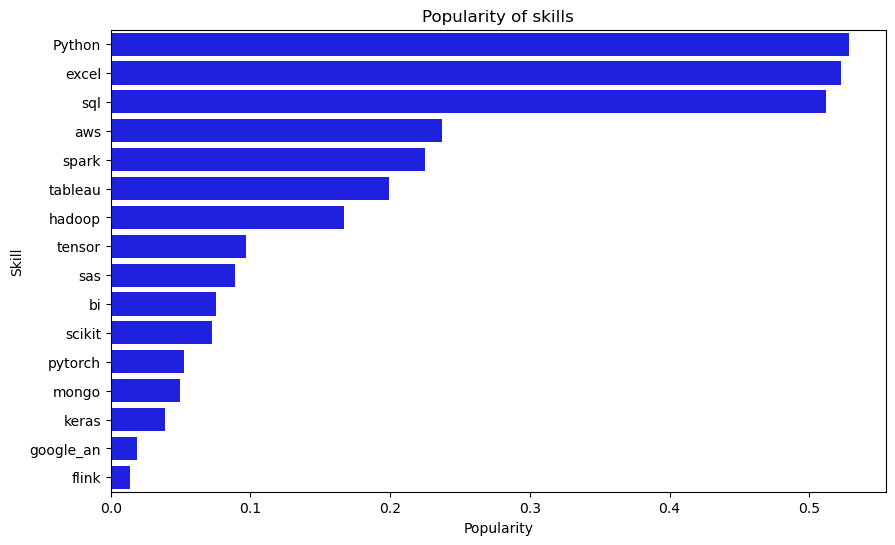

In [5]:
skills_popularity = df[skills].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=skills_popularity.values, y=skills_popularity.index,
            color='blue')
plt.title('Popularity of skills')
plt.xlabel('Popularity')
plt.ylabel('Skill')
plt.show()

In [6]:
df_skills = df[skills + ['Lower Salary', 'Upper Salary', 'Avg Salary(K)']]
results = pd.DataFrame(columns=['Skill', 'mean_lower_salary', 'median_lower_salary',
                                'mean_upper_salary', 'median_upper_salary',
                                'mean_avg_salary', 'median_avg_salary'])

for skill in skills:
    df_skills_subset = df_skills[df_skills[skill] == 1]

    mean_lower = np.round(df_skills_subset['Lower Salary'].mean(), 2)
    median_lower = np.round(df_skills_subset['Lower Salary'].median(), 2)
    mean_upper = np.round(df_skills_subset['Upper Salary'].mean(), 2)
    median_upper = np.round(df_skills_subset['Upper Salary'].median(), 2)
    mean_avg = np.round(df_skills_subset['Avg Salary(K)'].mean(), 2)
    median_avg = np.round(df_skills_subset['Avg Salary(K)'].median(), 2)

    results = results.append({'Skill' : skill,
                              'mean_lower_salary' : mean_lower,
                              'median_lower_salary' : median_lower,
                              'mean_upper_salary' : mean_upper,
                              'median_upper_salary' : median_upper,
                              'mean_avg_salary' : mean_avg,
                              'median_avg_salary' : median_avg}, ignore_index=True)  

results = results.set_index('Skill')

results.to_csv('../data/skills_salaries.csv')

print("Salaries depending on if the skill is required or not (in K$):")
results

Salaries depending on if the skill is required or not (in K$):


,mean_lower_salary,median_lower_salary,mean_upper_salary,median_upper_salary,mean_avg_salary,median_avg_salary
Skill,,,,,,
Python,84.28,80.0,141.02,134.0,112.65,107.00
spark,84.18,80.0,142.51,139.0,113.35,108.00
aws,84.12,77.5,142.05,133.5,113.08,107.00
excel,72.52,65.0,125.28,119.0,98.90,92.00
sql,75.29,72.0,127.83,124.0,101.56,98.50
sas,86.97,79.0,140.44,126.5,113.70,101.50
keras,89.97,89.0,155.97,166.0,122.97,124.50
pytorch,81.28,82.0,135.92,140.0,108.60,110.50
scikit,94.44,93.0,156.19,151.5,125.31,128.00


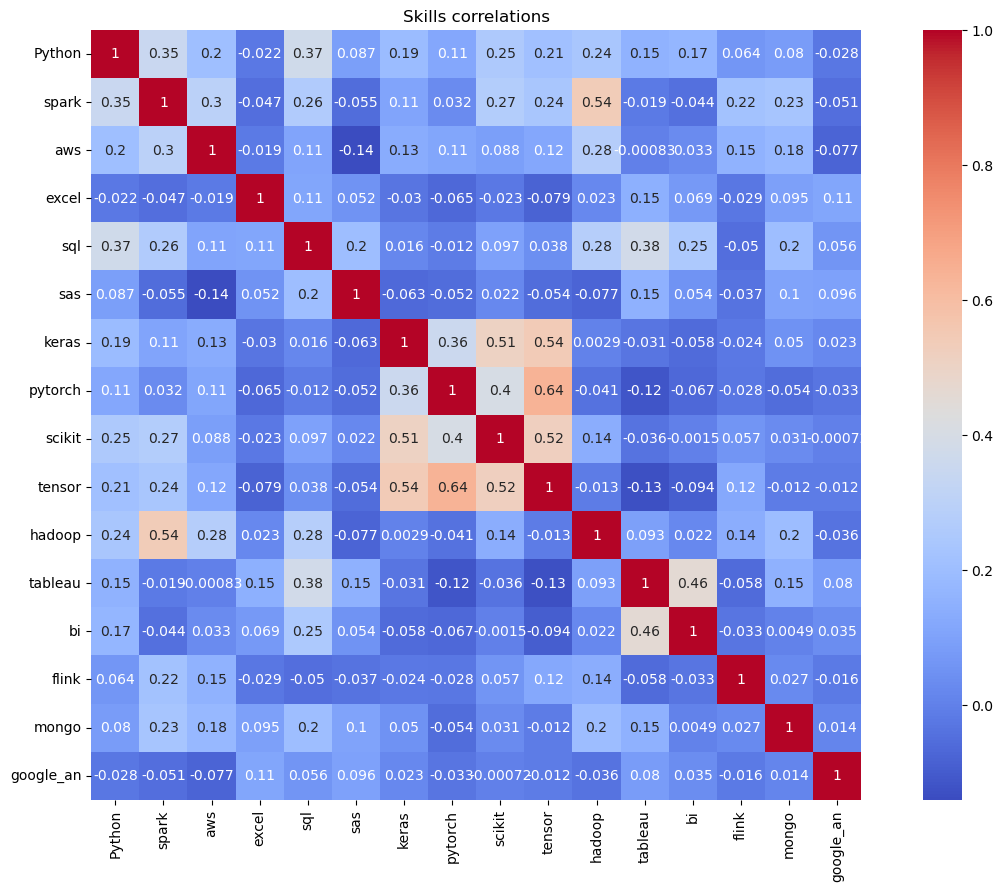

In [7]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_skills[skills].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Skills correlations")
plt.show()

In [8]:
corr = df_skills[skills].corr()
corr = np.round(corr.unstack().sort_values(ascending=False).drop_duplicates(), 3)

corr.to_csv('../data/skills_correlations.csv')

print("Skills with the highest correlation:")
corr[corr < 1][:5]

Skills with the highest correlation:


pytorch  tensor    0.637
keras    tensor    0.545
hadoop   spark     0.537
tensor   scikit    0.522
keras    scikit    0.506
dtype: float64